# DETECTING CREDIT CARD FRAUD
The aim of this R project is to build a classifier that can detect credit card fraudulent transactions. We will use a variety of machine learning algorithms that will be able to discern fraudulent from non-fraudulent one

# Importing the libraries

In [1]:
library(ranger)
library(caret)
library(data.table)

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




# Importing the Data and Data Exploration

In this section we will look into the data set of fraudulent credit cards.

In [2]:
creditcard_data <- read.csv("../input/creditcardfraud/creditcard.csv")
print(dim(creditcard_data))
head(creditcard_data,10)

[1] 284807     31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.53634674,1.3781552,-0.33832077,0.46238778,0.239598554,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.12853936,-0.18911484,0.133558377,-0.021053053,149.62,0
2,0,1.1918571,0.26615071,0.16648011,0.4481541,0.06001765,-0.08236081,-0.078802983,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.16717040,0.12589453,-0.008983099,0.014724169,2.69,0
3,1,-1.3583541,-1.34016307,1.77320934,0.3797796,-0.50319813,1.80049938,0.791460956,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.32764183,-0.13909657,-0.055352794,-0.059751841,378.66,0
4,1,-0.9662717,-0.18522601,1.79299334,-0.8632913,-0.01030888,1.24720317,0.237608940,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.64737603,-0.22192884,0.062722849,0.061457629,123.50,0
5,2,-1.1582331,0.87773675,1.54871785,0.4030339,-0.40719338,0.09592146,0.592940745,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.20600959,0.50229222,0.219422230,0.215153147,69.99,0
6,2,-0.4259659,0.96052304,1.14110934,-0.1682521,0.42098688,-0.02972755,0.476200949,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.23279382,0.10591478,0.253844225,0.081080257,3.67,0
7,4,1.2296576,0.14100351,0.04537077,1.2026127,0.19188099,0.27270812,-0.005159003,0.08121294,0.4649600,⋯,-0.167716266,-0.270709726,-0.15410379,-0.78005542,0.75013694,-0.25723685,0.034507430,0.005167769,4.99,0
8,7,-0.6442694,1.41796355,1.07438038,-0.4921990,0.94893409,0.42811846,1.120631358,-3.80786424,0.6153747,⋯,1.943465340,-1.015454710,0.05750353,-0.64970901,-0.41526657,-0.05163430,-1.206921081,-1.085339188,40.80,0
9,7,-0.8942861,0.28615720,-0.11319221,-0.2715261,2.66959866,3.72181806,0.370145128,0.85108444,-0.3920476,⋯,-0.073425100,-0.268091632,-0.20423267,1.01159180,0.37320468,-0.38415731,0.011747356,0.142404330,93.20,0


Checking the frequency of fraudulent and non fraudulent cards.

In [3]:
table(creditcard_data$Class)


     0      1 
284315    492 

Creating a summary, getting the column names and finding the standard deviation of the fraoud amount.

In [4]:
summary(creditcard_data$Amount)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     5.60    22.00    88.35    77.17 25691.16 

In [5]:
names(creditcard_data)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [6]:
print(var(creditcard_data$Amount))
print(sd(creditcard_data$Amount))

[1] 62560.07
[1] 250.1201


# Data Manipulation 

In this section we will manipulate the data by scaling the amount data using the scale() function.With the help of scaling, the data is structured according to a specified range. Therefore, there are no extreme values in our dataset that might interfere with the functioning of our model.

In [7]:
creditcard_data$Amount <- scale(creditcard_data$Amount)
NewData <- creditcard_data[,-c(1)]
head(NewData)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<int>
1,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,0.24496383,0
2,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,-0.34247394,0
3,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,1.16068389,0
4,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,0.14053401,0
5,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,0.75307443,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,-0.07340321,0
6,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,-0.37140720,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,-0.33855582,0


# Data Modeling

After scaling and standardizing the data we split the data into training and testing datsets.


In [8]:
library(caTools)
set.seed(123)
data_sample <- sample.split(NewData$Class,SplitRatio=0.80)
train_data <- subset(NewData,data_sample==TRUE)
test_data <- subset(NewData,data_sample==FALSE)
print(dim(train_data))
print(dim(test_data))

[1] 227846     30
[1] 56961    30


# Machine learning Algorithms

The machhine learning algorithms which we will be using are:
* Logistic Regression Model
* Decision Tree Model
* Gradient Boosting


## Fitting Logistic Regression Model

A logistic regression is used for modeling the outcome probability of a class such in our case fraud or not fraud

In [9]:
Logistic_Model=glm(Class~.,test_data,family=binomial())
summary(Logistic_Model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Class ~ ., family = binomial(), data = test_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.9019  -0.0254  -0.0156  -0.0078   4.0877  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -12.52800   10.30537  -1.216   0.2241  
V1           -0.17299    1.27381  -0.136   0.8920  
V2            1.44512    4.23062   0.342   0.7327  
V3            0.17897    0.24058   0.744   0.4569  
V4            3.13593    7.17768   0.437   0.6622  
V5            1.49014    3.80369   0.392   0.6952  
V6           -0.12428    0.22202  -0.560   0.5756  
V7            1.40903    4.22644   0.333   0.7388  
V8           -0.35254    0.17462  -2.019   0.0435 *
V9            3.02176    8.67262   0.348   0.7275  
V10          -2.89571    6.62383  -0.437   0.6620  
V11          -0.09769    0.28270  -0.346   0.7297  
V12           1.97992    6.56699   0.301   0.7630  
V13          -0.71674    1.25649  -0.570   0.5684  
V14           0.1931

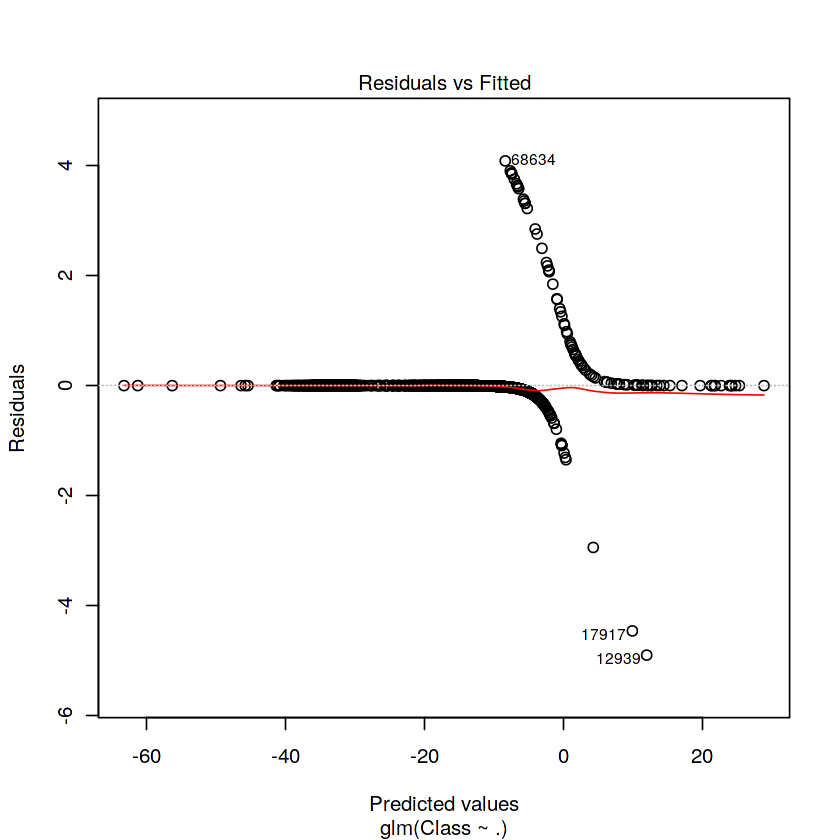

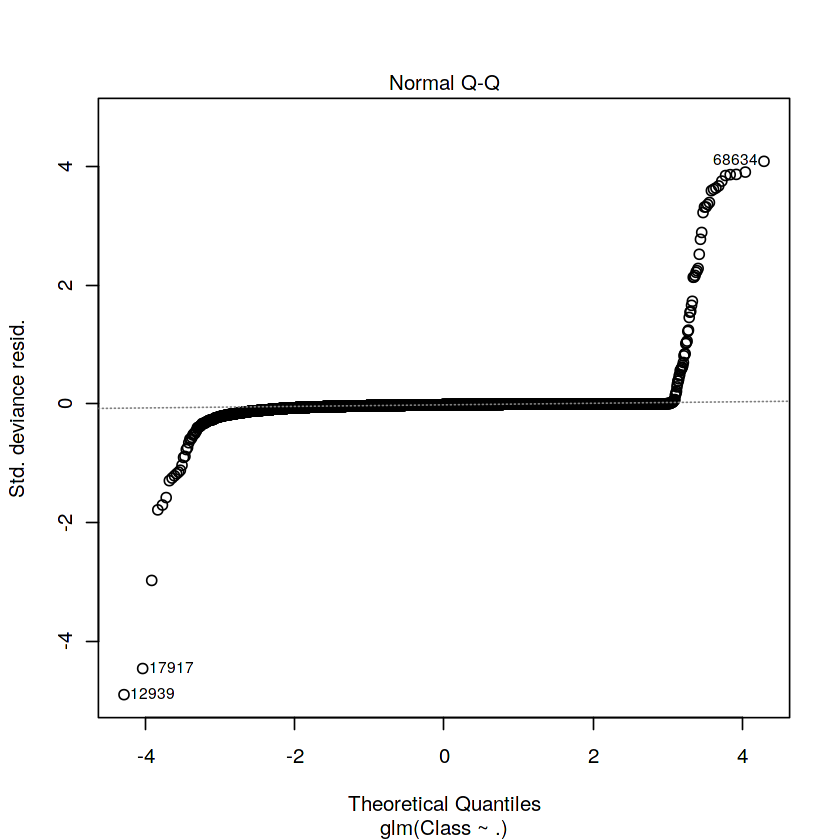

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


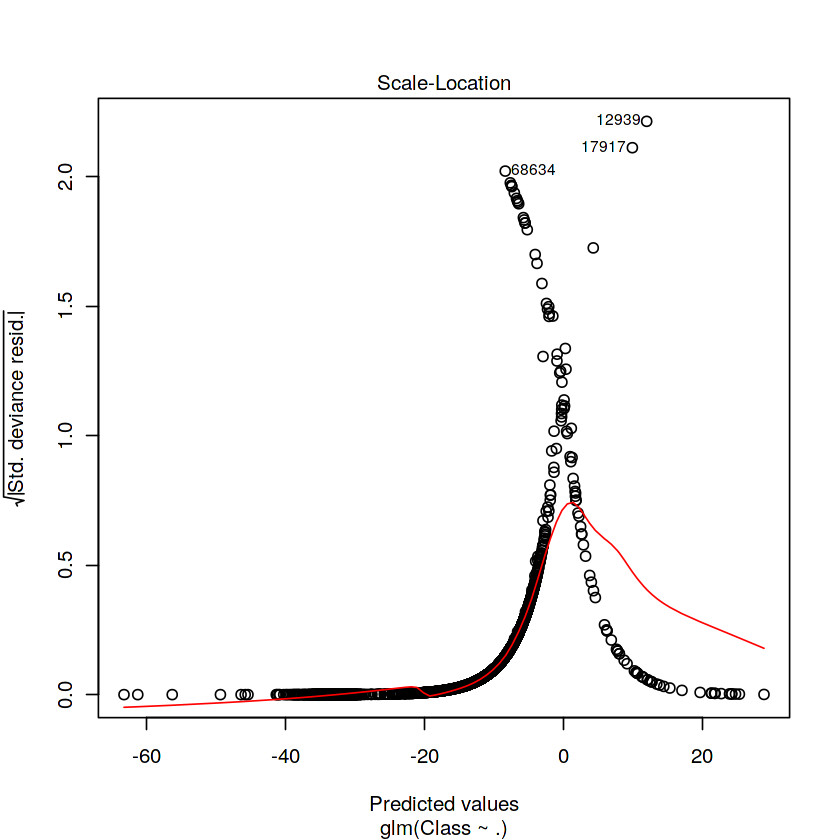

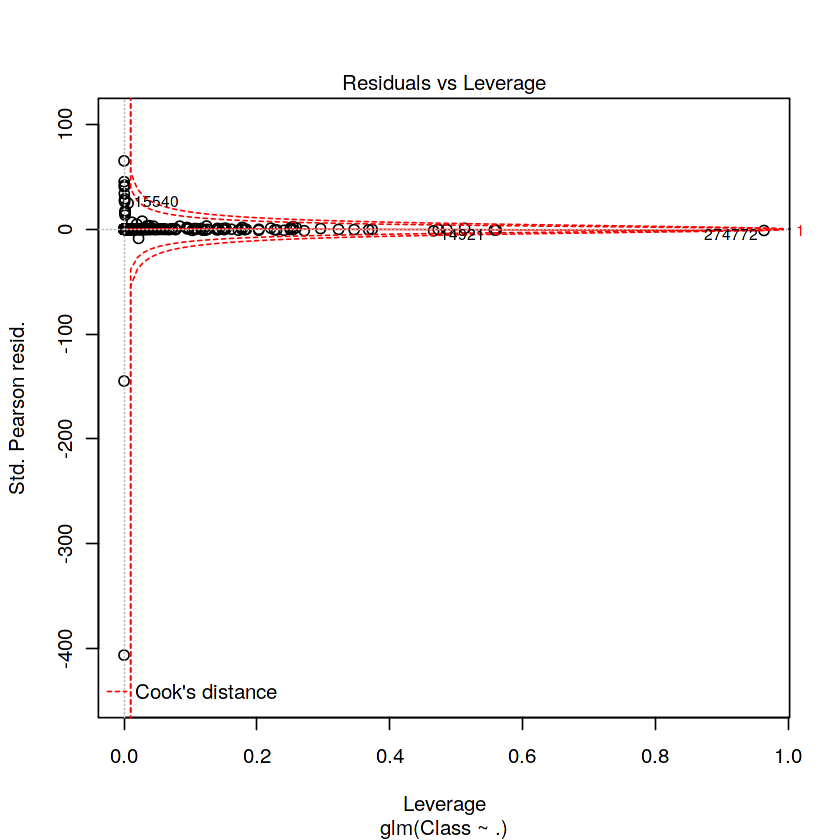

In [10]:
plot(Logistic_Model)

In order to assess the performance of our model, we will delineate the ROC curve. ROC is also known as Receiver Optimistic Characteristics. For this, we will first import the ROC package and then plot our ROC curve to analyze its performance.

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



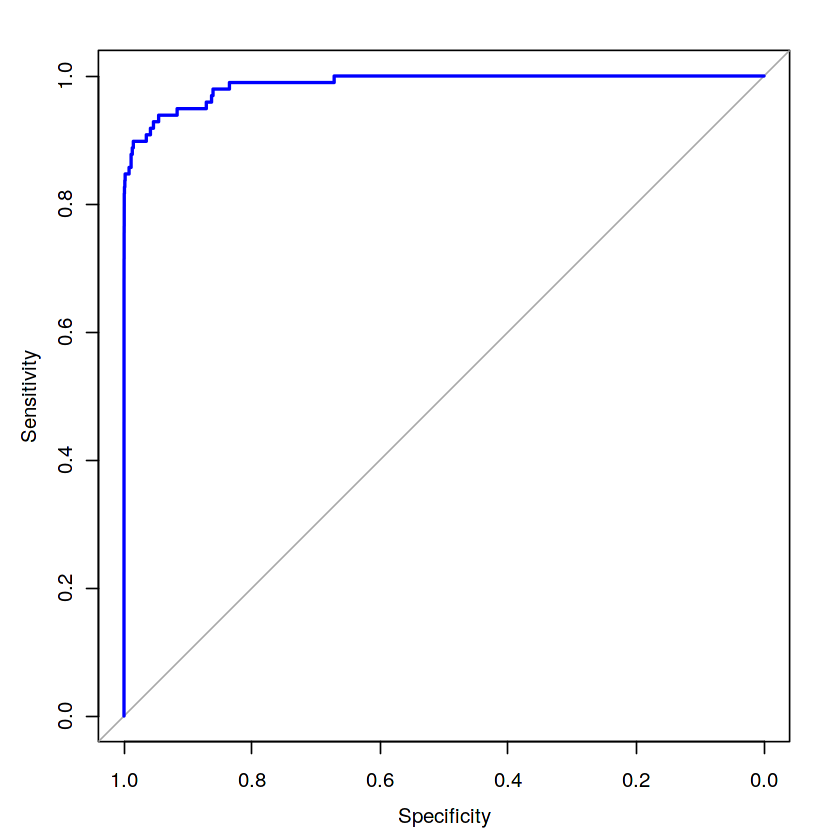

In [11]:
library(pROC)
lr.predict <- predict(Logistic_Model,test_data, probability = TRUE)
auc.gbm = roc(test_data$Class, lr.predict, plot = TRUE, col = "blue")

## Fitting a Decision Tree Model

 Decision Trees to plot the outcomes of a decision. These outcomes are basically a consequence through which we can conclude as to what class the object belongs to.The rpart code builds classification or regression models of a very general structure using a two stage procedure; the resulting models can be represented as binary trees. We will be using recursive parting.

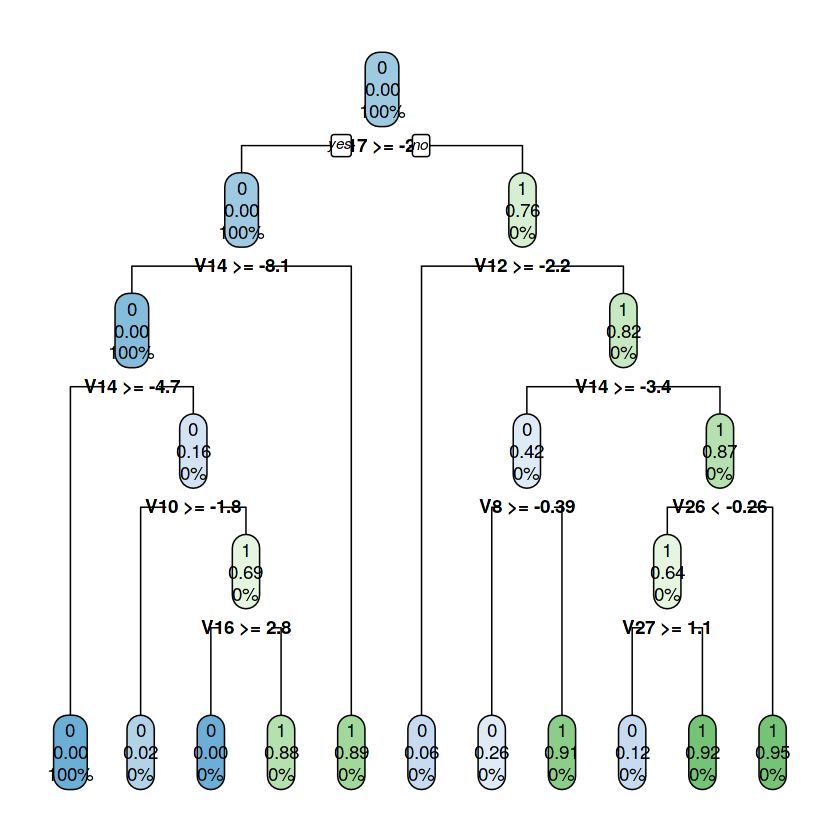

In [12]:
library(rpart)
library(rpart.plot)
decisionTree_model <- rpart(Class ~ . , creditcard_data, method = 'class')
predicted_val <- predict(decisionTree_model, creditcard_data, type = 'class')
probability <- predict(decisionTree_model, creditcard_data, type = 'prob')
rpart.plot(decisionTree_model)

## Gradient Boosting (GBM)

Gradient boosting performs regression and classification tasks. This model compromises of several underlying ensemble models like weak decision trees.

Loaded gbm 2.1.8



   user  system elapsed 
316.177   0.408 320.639 

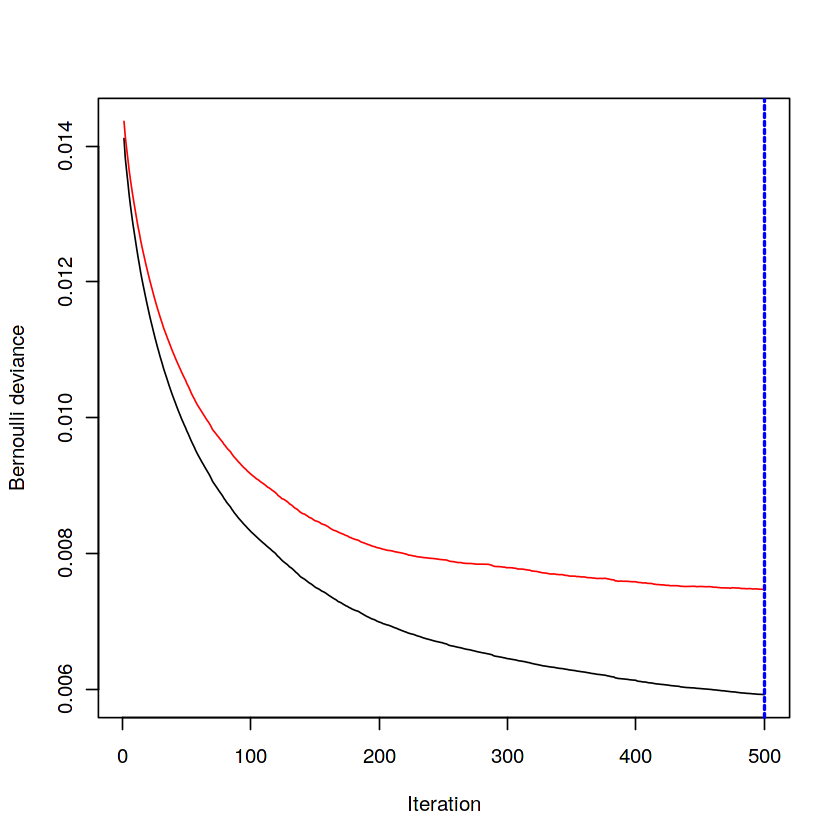

In [13]:
library(gbm, quietly=TRUE)

system.time(model_gbm <- gbm(Class ~ ., 
            distribution = "bernoulli",
            data = rbind(train_data, test_data), 
            n.trees = 500, 
            interaction.depth = 3, 
            n.minobsinnode = 100, 
            shrinkage = 0.01, 
            bag.fraction = 0.5, 
            train.fraction = nrow(train_data) / (nrow(train_data) + nrow(test_data))))

gbm.iter = gbm.perf(model_gbm, method = "test")

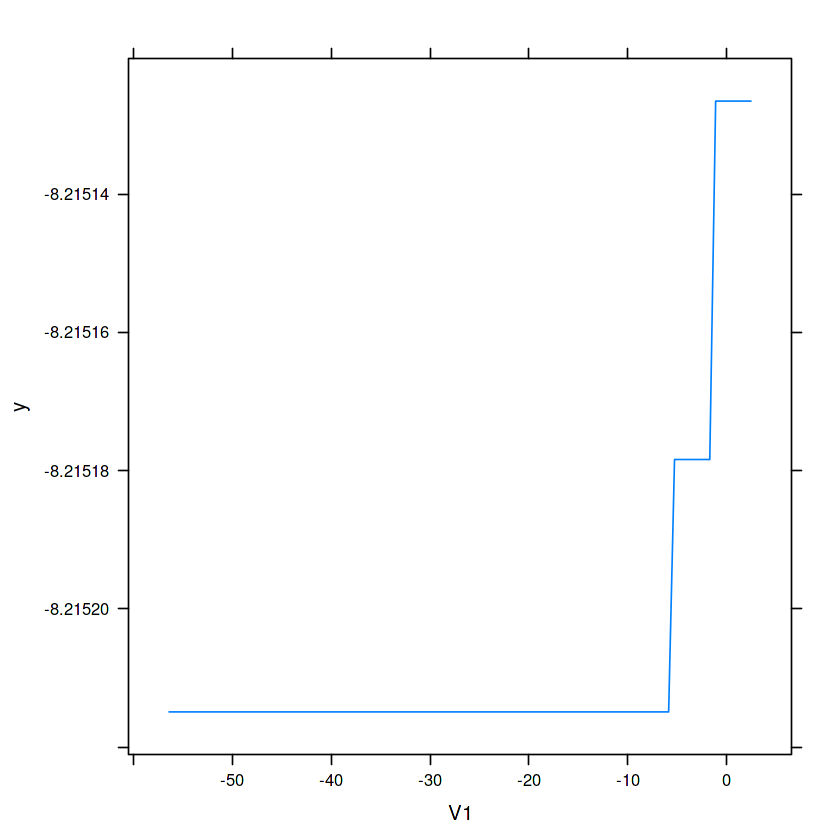

In [14]:
model.influence = relative.influence(model_gbm, n.trees = gbm.iter, sort. = TRUE)
#Plot the gbm model
plot(model_gbm)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test_data$Class, predictor = gbm_test,     plot = TRUE, col = "red")

Data: gbm_test in 56863 controls (test_data$Class 0) < 98 cases (test_data$Class 1).
Area under the curve: 0.9541


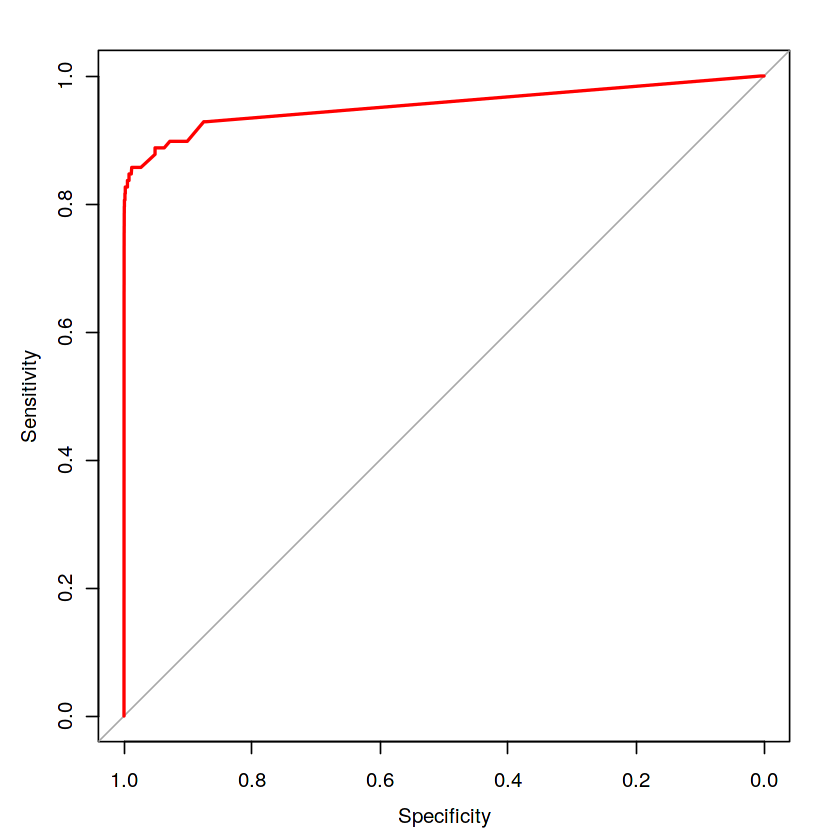

In [15]:
gbm_test = predict(model_gbm, newdata = test_data, n.trees = gbm.iter)
gbm_auc = roc(test_data$Class, gbm_test, plot = TRUE, col = "red")
print(gbm_auc)